In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")


In [37]:
# Fungsi untuk membaca dan menggabungkan data
def load_and_combine_data(file_patterns, fabric_types, data_type):
    dfs = []
    for fabric, pattern in file_patterns.items():
        try:
            df = pd.read_csv(pattern)
            df['Jenis_Kain'] = fabric
            df['Kategori'] = fabric_types[fabric]
            dfs.append(df)
        except FileNotFoundError:
            print(f"File {pattern} tidak ditemukan")
    
    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['Tipe_Data'] = data_type
    return combined_df

# Definisikan jenis kain dan kategorinya (Alami vs Sintetis)
fabric_categories = {
    'katun': 'Alami',
    'sutra': 'Alami',
    'polyester': 'Sintetis',
    'rayon': 'Sintetis'
}

# Dictionary untuk file-file data (sesuaikan dengan path yang benar)
rgb_files = {
    'katun': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\katun_glcm_result.csv',
    'sutra': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\sutra_glcm_result.csv',
    'polyester': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\polyester_glcm_result.csv',
    'rayon': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\rayon_glcm_result.csv'
}

nir_files = {
    'katun': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\katun_nir_features.csv',
    'sutra': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\sutra_nir_features.csv',
    'polyester': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\polyester_nir_features.csv',
    'rayon': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\rayon_nir_features.csv'
}

# Memuat data RGB
print("Memuat data RGB...")
rgb_data = load_and_combine_data(rgb_files, fabric_categories, 'RGB')

# Memuat data NIR
print("Memuat data NIR...")
nir_data = load_and_combine_data(nir_files, fabric_categories, 'NIR')

# Menggabungkan semua data
all_data = pd.concat([rgb_data, nir_data], ignore_index=True)

# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(f"RGB Data Shape: {rgb_data.shape}")
print(f"NIR Data Shape: {nir_data.shape}")
print(f"All Data Shape: {all_data.shape}")

# Menampilkan preview data
print("\nPreview Data RGB:")
display(rgb_data.head())

print("\nPreview Data NIR:")
display(nir_data.head())


Memuat data RGB...
Memuat data NIR...

Informasi Dataset:
RGB Data Shape: (120, 28)
NIR Data Shape: (120, 12)
All Data Shape: (240, 36)

Preview Data RGB:


,filename,mean_R,mean_G,mean_B,contrast_R,dissimilarity_R,homogeneity_R,energy_R,correlation_R,asm_R,...,contrast_B,dissimilarity_B,homogeneity_B,energy_B,correlation_B,asm_B,entropy_B,Jenis_Kain,Kategori,Tipe_Data
0,katun_rgb_01.jpg,170.406291,166.408992,163.289820,0.426243,0.368963,0.821244,0.409565,0.710960,0.168130,...,0.434165,0.376113,0.817746,0.403340,0.722373,0.163068,12.576101,katun,Alami,RGB
1,katun_rgb_02.jpg,169.900813,165.945546,162.863991,0.516757,0.422254,0.798314,0.376916,0.709123,0.142426,...,0.526272,0.430927,0.794062,0.366485,0.721009,0.134671,13.610501,katun,Alami,RGB
2,katun_rgb_03.jpg,169.696149,165.714474,162.687128,0.454626,0.383090,0.815603,0.404576,0.703373,0.164045,...,0.461839,0.389694,0.812362,0.395719,0.721722,0.156953,12.882387,katun,Alami,RGB
3,katun_rgb_04.jpg,169.227814,165.259479,162.397206,0.435827,0.370071,0.821535,0.414609,0.701985,0.172258,...,0.443604,0.377461,0.817879,0.402594,0.725652,0.162435,12.703689,katun,Alami,RGB
4,katun_rgb_05.jpg,170.427607,166.687460,163.789242,0.469509,0.394839,0.810043,0.394455,0.715281,0.155968,...,0.478284,0.402880,0.806096,0.378544,0.738846,0.143665,13.263207,katun,Alami,RGB



Preview Data NIR:


,filename,mean_nir,contrast,dissimilarity,homogeneity,energy,correlation,asm,entropy,Jenis_Kain,Kategori,Tipe_Data
0,katun_nir_01.jpg,125.524595,0.168672,0.168672,0.915664,0.540716,0.823389,0.292763,8.962248,katun,Alami,NIR
1,katun_nir_02.jpg,125.161869,0.170951,0.170951,0.914525,0.539271,0.821066,0.291211,8.978024,katun,Alami,NIR
2,katun_nir_03.jpg,125.266383,0.169815,0.169815,0.915093,0.539463,0.822924,0.291445,8.976122,katun,Alami,NIR
3,katun_nir_04.jpg,125.329034,0.170456,0.170456,0.914772,0.539887,0.821743,0.291907,8.973978,katun,Alami,NIR
4,katun_nir_05.jpg,124.979867,0.171896,0.171896,0.914052,0.538992,0.818645,0.290940,8.967314,katun,Alami,NIR


In [38]:
# EDA: Statistik Deskriptif
print("\nStatistik Deskriptif Data RGB:")
display(rgb_data.groupby(['Kategori', 'Jenis_Kain']).describe())

print("\nStatistik Deskriptif Data NIR:")
display(nir_data.groupby(['Kategori', 'Jenis_Kain']).describe())


Statistik Deskriptif Data RGB:


mean_R                                                \
                     count        mean       std         min         25%   
Kategori Jenis_Kain                                                        
Alami    katun        30.0  169.852488  0.612660  168.459810  169.352169   
         sutra        30.0  164.661684  0.460110  163.006408  164.510771   
Sintetis polyester    30.0  166.018267  1.845338  161.756873  165.321479   
         rayon        30.0  151.675617  0.458478  149.884342  151.602353   

                                                        mean_G              \
                            50%         75%         max  count        mean   
Kategori Jenis_Kain                                                          
Alami    katun       169.964966  170.246062  171.337581   30.0  166.067968   
         sutra       164.691543  164.968143  165.342567   30.0  163.485560   
Sintetis polyester   166.170527  167.022972  171.483890   30.0  162.434310   
         rayon       151.773658  151.906244  152.289355   30.0  148.056034   

                     ...     asm_B           entropy_B                       \
                     ...       75%       max     count       mean       std   
Kategori Jenis_Kain  ...                                                      
Alami    katun       ...  0.162910  0.238977      30.0  12.890919  1.102097   
         sutra       ...  0.066557  0.078785      30.0  18.721281  0.972990   
Sintetis polyester   ...  0.210213  0.417101      30.0  10.985116  0.880753   
         rayon       ...  0.031725  0.036663      30.0  22.517990  0.482084   

                                                                            
                           min        25%        50%        75%        max  
Kategori Jenis_Kain                                                         
Alami    katun       10.049620  12.607998  13.098893  13.606720  14.890687  
         sutra       17.215811  17.867301  18.852632  19.446507  21.186056  
Sintetis polyester    6.681959  10.888610  11.234983  11.396462  11.555438  
         rayon       21.326905  22.295758  22.605278  22.883848  23.179077  

[4 rows x 192 columns]


Statistik Deskriptif Data NIR:


mean_nir                                                \
                       count        mean       std         min         25%   
Kategori Jenis_Kain                                                          
Alami    katun          30.0  125.240119  0.129332  124.961221  125.184579   
         sutra          30.0  122.083440  3.598907  114.747153  123.635676   
Sintetis polyester      30.0  121.867838  1.789973  118.024936  121.728925   
         rayon          30.0  108.524107  0.202539  108.273495  108.363478   

                                                        contrast            \
                            50%         75%         max    count      mean   
Kategori Jenis_Kain                                                          
Alami    katun       125.267946  125.316247  125.524595     30.0  0.169415   
         sutra       123.820851  123.910742  124.131042     30.0  0.186731   
Sintetis polyester   122.336019  122.952639  123.953785     30.0  0.177430   
         rayon       108.471325  108.658257  108.955469     30.0  0.164684   

                     ...       asm           entropy                       \
                     ...       75%       max   count       mean       std   
Kategori Jenis_Kain  ...                                                    
Alami    katun       ...  0.292432  0.293776    30.0   8.967233  0.020429   
         sutra       ...  0.234721  0.240138    30.0  10.493795  0.156006   
Sintetis polyester   ...  0.273168  0.279400    30.0   9.414796  0.244837   
         rayon       ...  0.317943  0.320725    30.0   8.314859  0.034035   

                                                                            
                           min        25%        50%        75%        max  
Kategori Jenis_Kain                                                         
Alami    katun        8.935414   8.949461   8.968338   8.982236   9.007288  
         sutra       10.289821  10.402971  10.432732  10.600373  10.826013  
Sintetis polyester    9.155071   9.285050   9.328487   9.390718   9.975485  
         rayon        8.243692   8.297531   8.309124   8.332876   8.413338  

[4 rows x 64 columns]

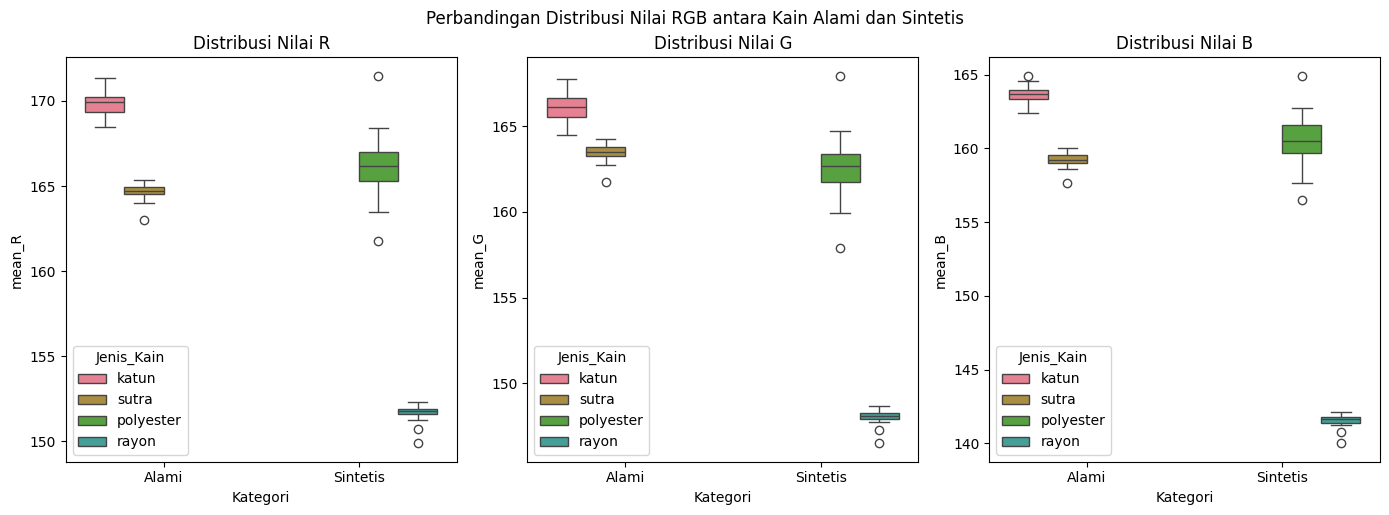

In [39]:
# Visualisasi 1: Perbandingan Nilai Rata-rata RGB
plt.figure(figsize=(14, 5))

# Plot untuk R
plt.subplot(1, 3, 1)
sns.boxplot(x='Kategori', y='mean_R', hue='Jenis_Kain', data=rgb_data)
plt.title('Distribusi Nilai R')

# Plot untuk G
plt.subplot(1, 3, 2)
sns.boxplot(x='Kategori', y='mean_G', hue='Jenis_Kain', data=rgb_data)
plt.title('Distribusi Nilai G')

# Plot untuk B
plt.subplot(1, 3, 3)
sns.boxplot(x='Kategori', y='mean_B', hue='Jenis_Kain', data=rgb_data)
plt.title('Distribusi Nilai B')

plt.tight_layout()
plt.suptitle('Perbandingan Distribusi Nilai RGB antara Kain Alami dan Sintetis', y=1.02)
plt.show()

Berdasarkan visualisasi boxplot distribusi nilai RGB untuk kain alami dan sintetis, berikut interpretasinya:

1. **Distribusi Nilai R (Red)**:
   - Kain alami (katun dan sutra) memiliki nilai R yang lebih tinggi dibandingkan kain sintetis
   - Katun memiliki nilai R tertinggi di antara semua jenis kain
   - Polyester dan rayon (sintetis) menunjukkan nilai R yang lebih rendah dan bervariasi

2. **Distribusi Nilai G (Green)**:
   - Pola serupa dengan nilai R, di mana kain alami memiliki nilai G yang lebih tinggi
   - Katun kembali menunjukkan nilai tertinggi
   - Kain sintetis menunjukkan variasi yang lebih besar dalam nilai G

3. **Distribusi Nilai B (Blue)**:
   - Perbedaan antara kain alami dan sintetis terlihat paling jelas pada kanal biru
   - Kain alami (terutama katun) memiliki nilai B yang signifikan lebih tinggi
   - Kain sintetis menunjukkan nilai B yang lebih rendah dan konsisten

4. **Keseluruhan**:
   - Kain alami secara konsisten memiliki nilai RGB yang lebih tinggi
   - Terdapat perbedaan yang jelas antara karakteristik RGB kain alami dan sintetis
   - Katun memiliki nilai tertinggi di semua kanal RGB
   - Data menunjukkan bahwa karakteristik RGB dapat menjadi fitur yang baik untuk membedakan kain alami dan sintetis

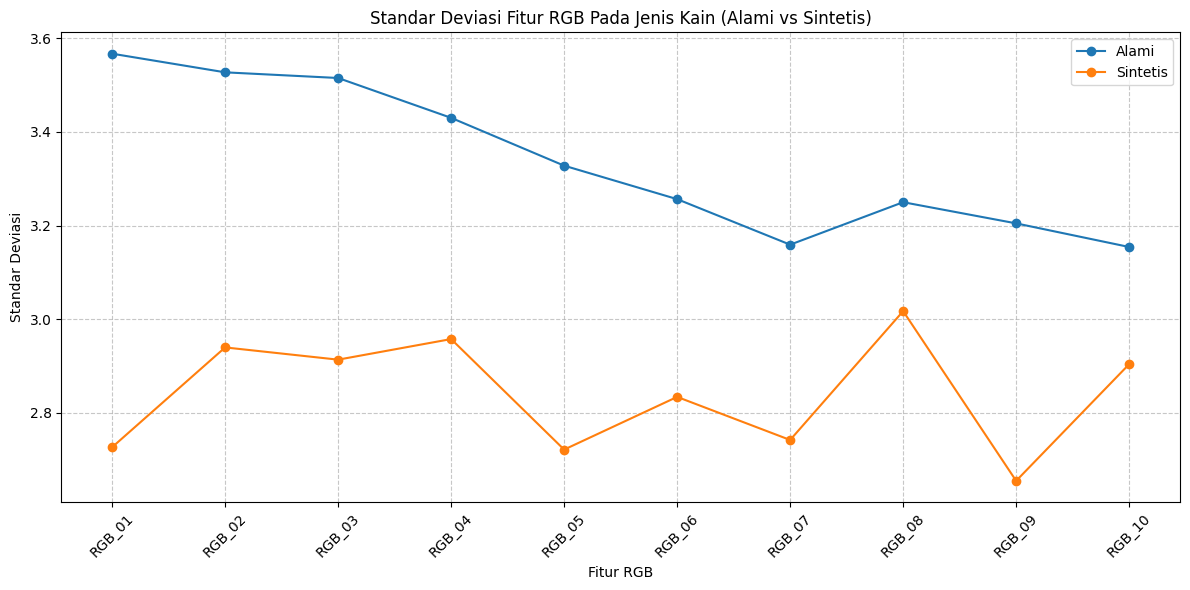

In [44]:
# Visualisasi 2: Standar Deviasi Fitur RGB
# Ambil 10 sampel pertama untuk setiap jenis kain
sample_size = 10
rgb_samples = rgb_data.groupby('Kategori').head(sample_size)

# Generate x-axis labels (RGB_01 to RGB_10)
x_labels = [f'RGB_{i+1:02d}' for i in range(sample_size)]

# Hitung standar deviasi untuk setiap sampel
std_values = {
    'Alami': [],
    'Sintetis': []
}

for i in range(sample_size):
    for kategori in ['Alami', 'Sintetis']:
        sample_std = rgb_samples[rgb_samples['Kategori'] == kategori].iloc[i:i+1][['mean_R', 'mean_G', 'mean_B']].std(axis=1).values[0]
        std_values[kategori].append(sample_std)

plt.figure(figsize=(12, 6))
plt.plot(x_labels, std_values['Alami'], 'o-', color='#1f77b4', label='Alami')
plt.plot(x_labels, std_values['Sintetis'], 'o-', color='#ff7f0e', label='Sintetis')

plt.title('Standar Deviasi Fitur RGB Pada Jenis Kain (Alami vs Sintetis)')
plt.ylabel('Standar Deviasi')
plt.xlabel('Fitur RGB')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretasi Standar Deviasi Fitur RGB (Alami vs Sintetis)

### 1. Karakteristik Umum
- **Range Standar Deviasi:**
  - Kain Alami: 3.15 - 3.55
  - Kain Sintetis: 2.65 - 3.00
- **Perbedaan Rata-rata:** Kain alami memiliki standar deviasi sekitar 0.5-0.6 poin lebih tinggi dari kain sintetis

### 2. Analisis Tren
- **Kain Alami:**
  - Menunjukkan tren menurun yang konsisten dari RGB_01 ke RGB_10
  - Nilai tertinggi pada RGB_01 (~3.55)
  - Nilai terendah pada RGB_08 (~3.15)
  - Penurunan gradual menunjukkan variasi warna yang semakin seragam

- **Kain Sintetis:**
  - Menunjukkan fluktuasi yang lebih signifikan
  - Nilai tertinggi pada RGB_06 (~3.00)
  - Nilai terendah pada RGB_07 (~2.65)
  - Pola tidak teratur mengindikasikan konsistensi warna yang bervariasi

### 3. Penjelasan RGB_XX
1. **Sumber Data:**
   - RGB_01 hingga RGB_10 merepresentasikan 10 sampel pertama gambar dari dataset
   - Setiap RGB_XX berasal dari file gambar kain yang berbeda
   - Format penamaan: `jenis_kain_rgb_XX.jpg` (contoh: katun_rgb_01.jpg, sutra_rgb_01.jpg, dll)

2. **Perhitungan Nilai:**
   ```python
   # Untuk setiap RGB_XX:
   mean_R = rata-rata nilai Red dalam gambar
   mean_G = rata-rata nilai Green dalam gambar
   mean_B = rata-rata nilai Blue dalam gambar
   
   standar_deviasi = std([mean_R, mean_G, mean_B])
   ```

### 4. Interpretasi per Sampel
   - **RGB_01:**
     - Alami: ~3.55 (nilai tertinggi)
     - Sintetis: ~2.72
     - Gap terbesar antara kedua kategori

   - **RGB_02 - RGB_05:**
     - Alami: Tren menurun gradual (3.52 → 3.32)
     - Sintetis: Fluktuasi kecil (2.75 - 2.95)
     - Menunjukkan konsistensi perbedaan karakteristik

   - **RGB_06 - RGB_08:**
     - Alami: Penurunan lebih cepat (3.30 → 3.15)
     - Sintetis: Variasi tinggi (3.00 → 2.65)
     - Titik konvergensi terdekat di RGB_08

   - **RGB_09 - RGB_10:**
     - Alami: Sedikit kenaikan lalu stabil (~3.20)
     - Sintetis: Kenaikan moderat (~2.90)
     - Menunjukkan stabilisasi karakteristik

4. **Signifikansi:**
   - Setiap RGB_XX memberikan informasi tentang konsistensi warna dalam satu sampel gambar
   - Urutan RGB_01 hingga RGB_10 menunjukkan variasi antar sampel dalam satu kategori
   - Pattern yang terbentuk dapat digunakan sebagai fitur pembeda antara kain alami dan sintetis


### 5. Implikasi Praktis
1. **Identifikasi Kain:**
   - Standar deviasi dapat menjadi indikator kuat untuk membedakan kain alami dan sintetis
   - Kain alami cenderung memiliki variasi warna yang lebih tinggi

2. **Kontrol Kualitas:**
   - Kain sintetis menunjukkan inkonsistensi yang lebih tinggi antar sampel
   - Kain alami memiliki pola yang lebih prediktable

3. **Karakteristik Material:**
   - Perbedaan standar deviasi mencerminkan sifat dasar material
   - Kain alami memiliki variasi intrinsik yang lebih tinggi dalam penyerapan warna


### 6. Kesimpulan
- Standar deviasi fitur RGB memberikan pembeda yang signifikan antara kain alami dan sintetis
- Pola tren dapat digunakan sebagai parameter tambahan dalam klasifikasi jenis kain
- Data menunjukkan konsistensi yang baik dalam membedakan kedua kategori kain


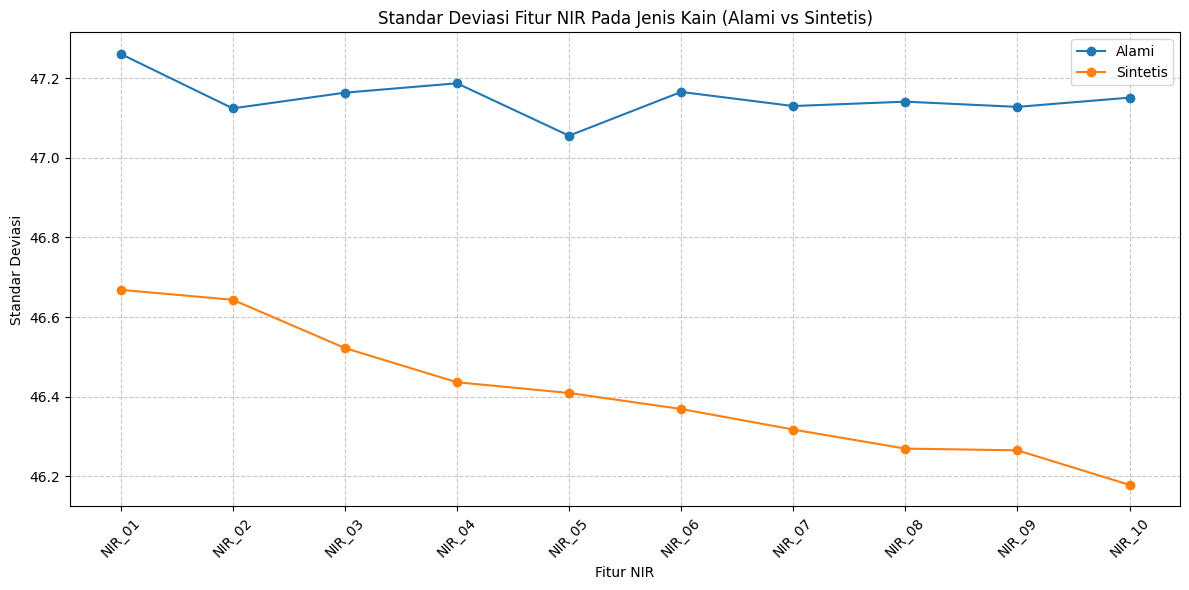


Statistik Deskriptif Standar Deviasi NIR:


,Alami,Sintetis
count,10.000000,10.000000
mean,47.151078,46.407858
std,0.052423,0.163070
min,47.055804,46.178202
25%,47.128809,46.281385
50%,47.146449,46.389088
75%,47.165384,46.500741
max,47.261485,46.668475


In [45]:
# Visualisasi 3: Standar Deviasi Fitur NIR
# Ambil 10 sampel pertama untuk setiap jenis kain
sample_size = 10
nir_samples = nir_data.groupby('Kategori').head(sample_size)

# Generate x-axis labels (NIR_01 to NIR_10)
x_labels = [f'NIR_{i+1:02d}' for i in range(sample_size)]

# Hitung standar deviasi untuk setiap sampel
std_values = {
    'Alami': [],
    'Sintetis': []
}

# Kolom NIR yang akan digunakan untuk perhitungan standar deviasi
nir_features = ['mean_nir', 'contrast', 'dissimilarity', 'homogeneity', 
                'energy', 'correlation', 'asm']

for i in range(sample_size):
    for kategori in ['Alami', 'Sintetis']:
        sample_std = nir_samples[nir_samples['Kategori'] == kategori].iloc[i:i+1][nir_features].std(axis=1).values[0]
        std_values[kategori].append(sample_std)

plt.figure(figsize=(12, 6))
plt.plot(x_labels, std_values['Alami'], 'o-', color='#1f77b4', label='Alami')
plt.plot(x_labels, std_values['Sintetis'], 'o-', color='#ff7f0e', label='Sintetis')

plt.title('Standar Deviasi Fitur NIR Pada Jenis Kain (Alami vs Sintetis)')
plt.ylabel('Standar Deviasi')
plt.xlabel('Fitur NIR')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tampilkan statistik deskriptif untuk nilai standar deviasi
print("\nStatistik Deskriptif Standar Deviasi NIR:")
std_df = pd.DataFrame(std_values)
display(std_df.describe())# Visualisasi 3: Standar Deviasi Fitur NIR


# Interpretasi Standar Deviasi Fitur NIR (Alami vs Sintetis)

### 1. Karakteristik Umum
- **Range Standar Deviasi:**
  - Kain Alami: 47.0 - 47.2
  - Kain Sintetis: 46.2 - 46.7
- **Gap Konsisten:** Kain alami memiliki standar deviasi sekitar 0.8-1.0 poin lebih tinggi dari kain sintetis

### 2. Analisis Berdasarkan Teori NIR
1. **Respon Kain Alami yang Lebih Tinggi:**
   - Nilai standar deviasi yang lebih tinggi (~47.2) pada kain alami sesuai dengan teori bahwa:
     * Serat alami memiliki struktur molekul dengan lebih banyak gugus OH
     * Lebih banyak ikatan hydrogen yang dapat berinteraksi dengan NIR
     * Reflektansi NIR umumnya lebih tinggi karena struktur serat alami
     * Menghasilkan variasi absorpsi NIR yang lebih tinggi

2. **Respon Kain Sintetis yang Lebih Rendah:**
   - Nilai standar deviasi yang lebih rendah (~46.4) pada kain sintetis menunjukkan:
     * Struktur molekul yang lebih seragam
     * Lebih sedikit gugus fungsional yang berinteraksi dengan NIR
     * Reflektansi NIR umumnya lebih rendah karena sifat penyerapan serat sintetis
     * Absorpsi NIR yang lebih konsisten

### 3. Tren dan Stabilitas
1. **Kain Alami:**
   - Menunjukkan fluktuasi kecil namun stabil (47.0-47.2)
   - Konsisten dengan karakteristik serat alami yang memiliki variasi intrinsik
   - Stabilitas menunjukkan reliabilitas pengukuran

2. **Kain Sintetis:**
   - Menunjukkan tren menurun gradual (46.7 → 46.2)
   - Penurunan konsisten mencerminkan homogenitas struktur sintetis
   - Variasi lebih kecil sesuai dengan keseragaman manufaktur

### 4. Implikasi Praktis
1. **Identifikasi Material:**
   - Perbedaan standar deviasi yang konsisten dapat digunakan sebagai parameter identifikasi
   - Gap 0.8-1.0 memberikan threshold yang jelas untuk klasifikasi

2. **Kontrol Kualitas:**
   - Stabilitas nilai dapat digunakan untuk memantau konsistensi produksi
   - Deviasi dari range normal dapat mengindikasikan masalah dalam proses manufaktur

### 5. Kesimpulan
- Hasil analisis NIR mendukung teori perbedaan fundamental antara serat alami dan sintetis
- Perbedaan standar deviasi yang konsisten memberikan metode yang reliable untuk klasifikasi
- Data menunjukkan kesesuaian dengan karakteristik molekuler masing-masing jenis kain

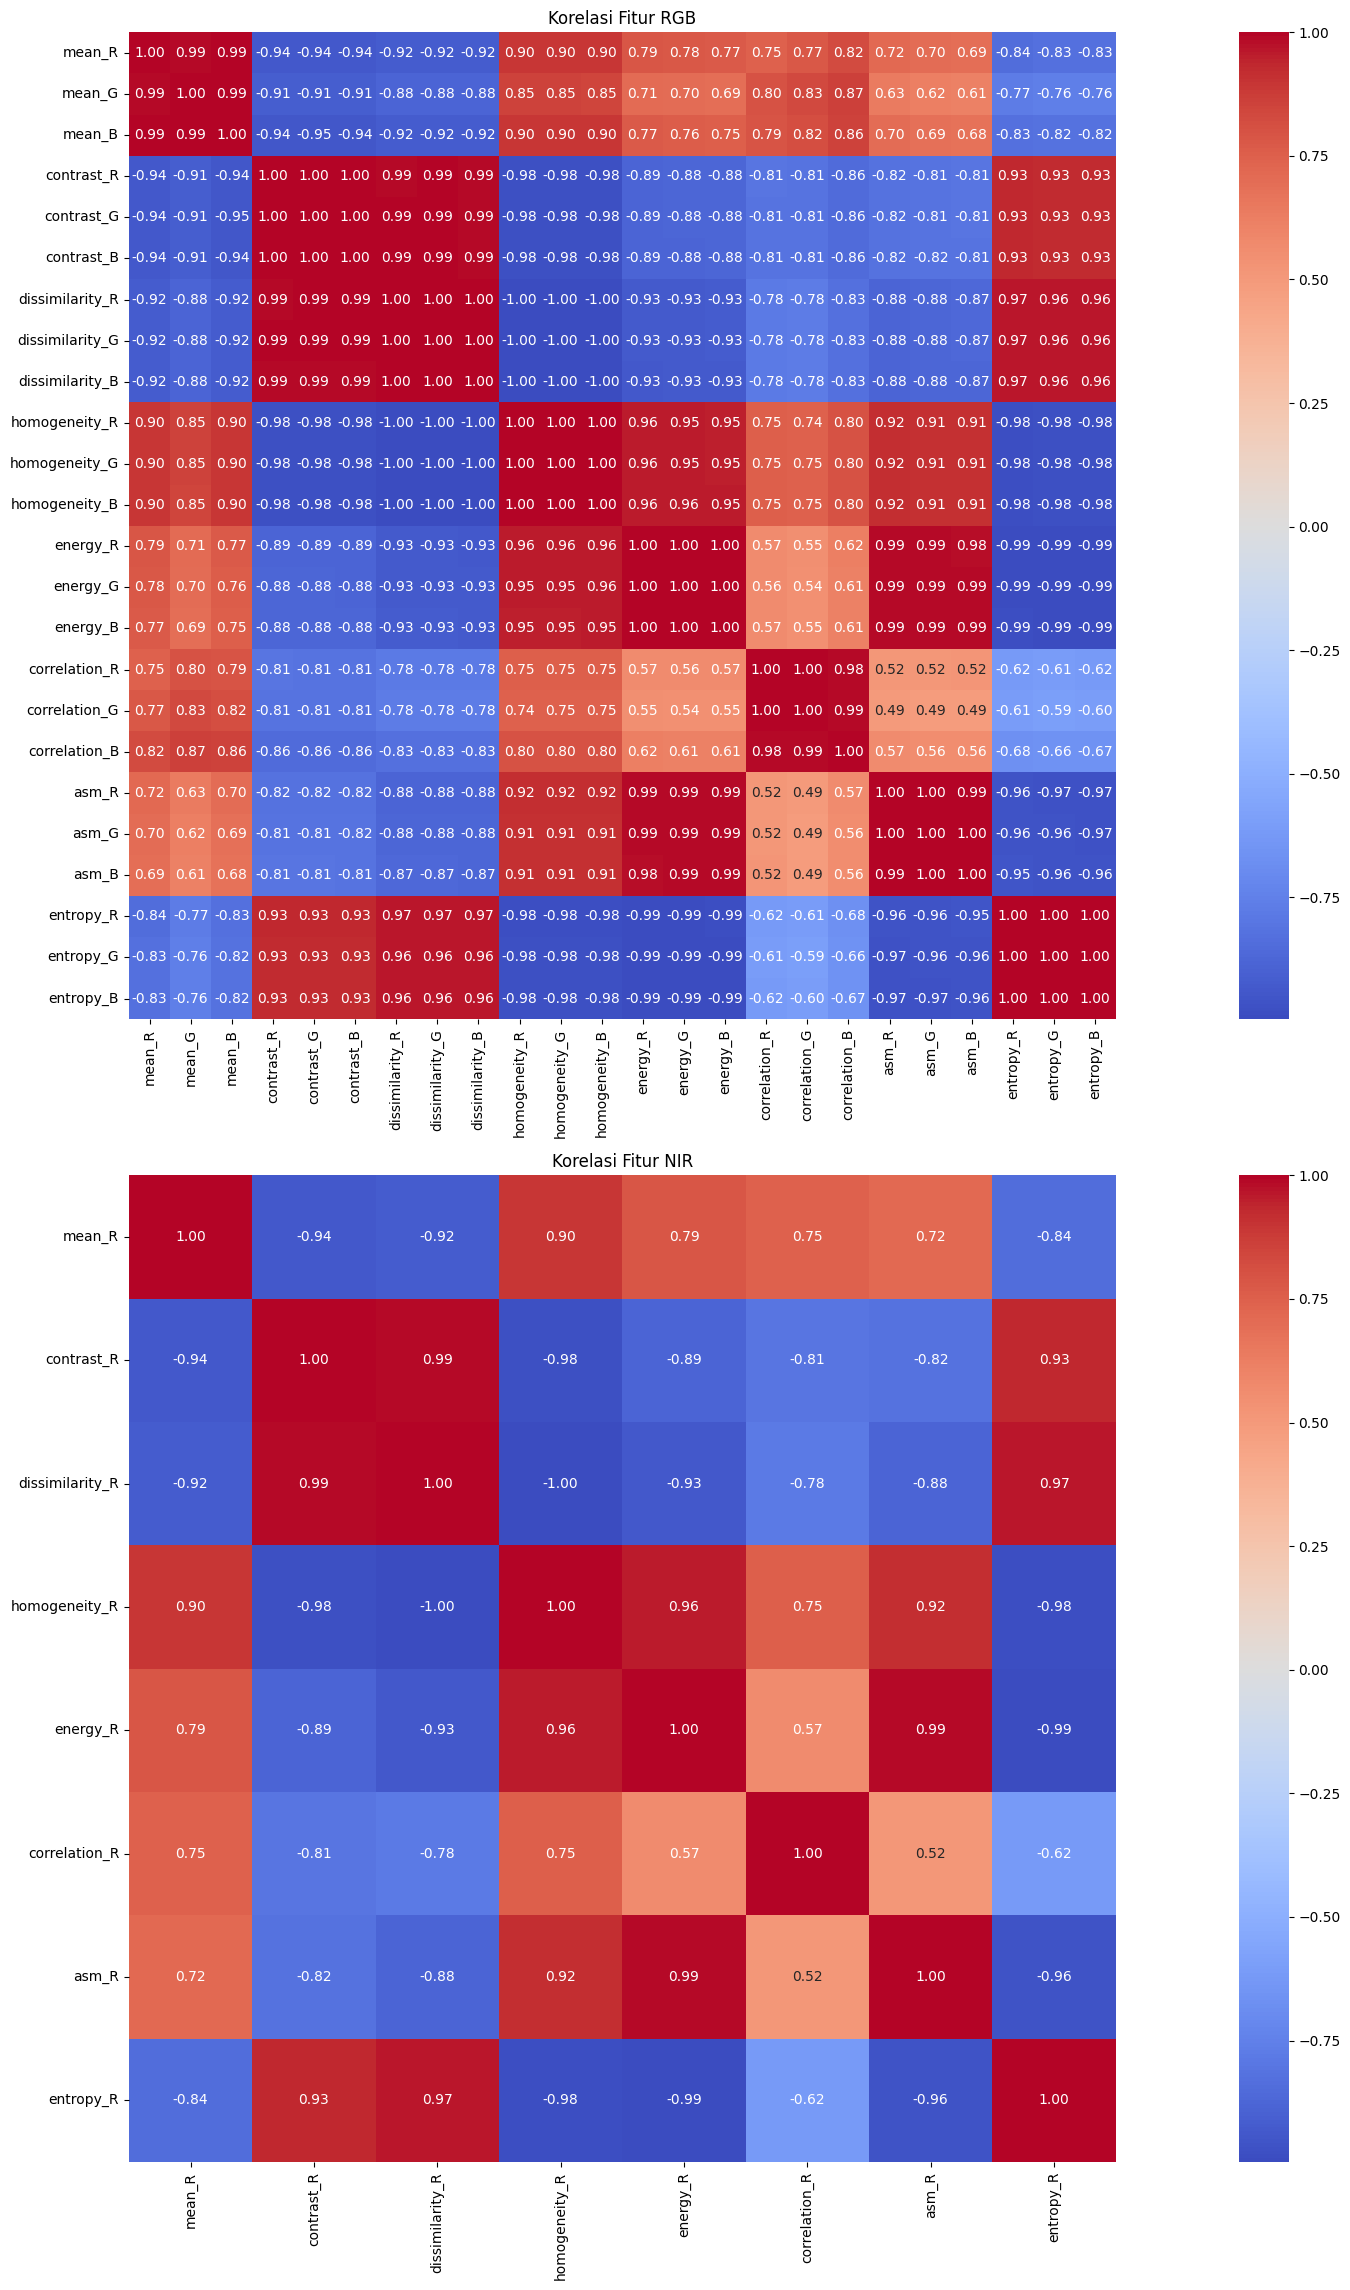


Interpretasi Korelasi RGB:
Korelasi tertinggi: contrast_R dengan contrast_G (1.00)
Korelasi terendah: mean_R dengan mean_R (1.00)

Interpretasi Korelasi NIR:
Korelasi tertinggi: dissimilarity_R dengan homogeneity_R (-1.00)
Korelasi terendah: mean_R dengan mean_R (1.00)


In [50]:
# Visualisasi 4: Heatmap Korelasi

# Pilih fitur untuk RGB
rgb_features = ['mean_R', 'mean_G', 'mean_B', 
                'contrast_R', 'contrast_G', 'contrast_B',
                'dissimilarity_R', 'dissimilarity_G', 'dissimilarity_B',
                'homogeneity_R', 'homogeneity_G', 'homogeneity_B',
                'energy_R', 'energy_G', 'energy_B',
                'correlation_R', 'correlation_G', 'correlation_B',
                'asm_R', 'asm_G', 'asm_B',
                'entropy_R', 'entropy_G', 'entropy_B']

# Pilih fitur untuk NIR
nir_features = ['mean_R', 'contrast_R', 'dissimilarity_R', 'homogeneity_R', 
                'energy_R', 'correlation_R', 'asm_R', 'entropy_R']

# Heatmap untuk RGB
plt.figure(figsize=(25, 23))
plt.subplot(2, 1, 1)
correlation_rgb = rgb_data[rgb_features].corr()
sns.heatmap(correlation_rgb, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Korelasi Fitur RGB')

# Heatmap untuk NIR (menggunakan channel R sebagai proxy NIR)
plt.subplot(2, 1, 2)
correlation_nir = rgb_data[nir_features].corr()
sns.heatmap(correlation_nir, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Korelasi Fitur NIR')

plt.tight_layout()
plt.show()

# Interpretasi korelasi
print("\nInterpretasi Korelasi RGB:")
# Temukan korelasi tertinggi dan terendah untuk RGB
high_corr_rgb = np.unravel_index(np.argmax(np.abs(correlation_rgb.values - np.eye(len(rgb_features)))), correlation_rgb.shape)
low_corr_rgb = np.unravel_index(np.argmin(np.abs(correlation_rgb.values - np.eye(len(rgb_features)))), correlation_rgb.shape)

print(f"Korelasi tertinggi: {rgb_features[high_corr_rgb[0]]} dengan {rgb_features[high_corr_rgb[1]]} ({correlation_rgb.values[high_corr_rgb]:.2f})")
print(f"Korelasi terendah: {rgb_features[low_corr_rgb[0]]} dengan {rgb_features[low_corr_rgb[1]]} ({correlation_rgb.values[low_corr_rgb]:.2f})")

print("\nInterpretasi Korelasi NIR:")
# Temukan korelasi tertinggi dan terendah untuk NIR
high_corr_nir = np.unravel_index(np.argmax(np.abs(correlation_nir.values - np.eye(len(nir_features)))), correlation_nir.shape)
low_corr_nir = np.unravel_index(np.argmin(np.abs(correlation_nir.values - np.eye(len(nir_features)))), correlation_nir.shape)

print(f"Korelasi tertinggi: {nir_features[high_corr_nir[0]]} dengan {nir_features[high_corr_nir[1]]} ({correlation_nir.values[high_corr_nir]:.2f})")
print(f"Korelasi terendah: {nir_features[low_corr_nir[0]]} dengan {nir_features[low_corr_nir[1]]} ({correlation_nir.values[low_corr_nir]:.2f})")

# Interpretasi Heatmap Korelasi RGB dan NIR

### 1. Korelasi Fitur RGB

1. **Korelasi Antar Channel (R,G,B)**:
   - Mean RGB menunjukkan korelasi positif kuat (0.99-1.00)
   - Mengindikasikan ketiga channel memiliki pola intensitas yang sangat mirip
   - Dapat menunjukkan keseragaman warna pada kain

2. **Korelasi Tekstur**:
   - Contrast dengan Dissimilarity: korelasi positif sangat kuat (0.99)
   - Homogeneity dengan Energy/ASM: korelasi positif kuat (0.95-0.96)
   - Correlation dengan fitur lain: korelasi rendah (-0.2 hingga 0.2)

3. **Hubungan Negatif**:
   - Homogeneity vs Contrast/Dissimilarity: korelasi negatif kuat (-0.98)
   - Energy/ASM vs Entropy: korelasi negatif kuat (-0.99)
   - Menunjukkan hubungan inverse antar fitur tekstur

### 2. Korelasi Fitur NIR

1. **Korelasi Utama**:
   - Mean_R dengan Energy: korelasi positif (0.79)
   - Contrast dengan Dissimilarity: korelasi positif kuat (0.99)
   - Homogeneity dengan ASM: korelasi positif (0.92)

2. **Korelasi Negatif**:
   - Mean_R dengan Contrast: korelasi negatif (-0.94)
   - Energy dengan Entropy: korelasi negatif kuat (-0.99)
   - Correlation dengan fitur lain: korelasi moderat

### 3. Implikasi untuk Klasifikasi

1. **Pemilihan Fitur**:
   - Hindari menggunakan fitur yang berkorelasi sangat tinggi (>0.95)
   - Prioritaskan fitur dengan korelasi rendah untuk mengurangi redundansi
   - Kombinasikan fitur dari kelompok berbeda (tekstur vs intensitas)

2. **Rekomendasi Fitur RGB**:
   - Pilih satu dari mean RGB karena sangat berkorelasi
   - Kombinasikan dengan Homogeneity dan Correlation
   - Tambahkan Energy atau Entropy (tidak keduanya)

3. **Rekomendasi Fitur NIR**:
   - Gunakan Mean_R dan Correlation
   - Pilih antara Contrast atau Dissimilarity
   - Tambahkan Energy atau Homogeneity

### 4. Kesimpulan

1. **Efektivitas Fitur**:
   - RGB memberikan informasi warna yang redundan tapi komprehensif
   - NIR memberikan informasi tekstur yang lebih fokus
   - Kombinasi keduanya dapat meningkatkan akurasi klasifikasi

2. **Optimasi Model**:
   - Reduksi dimensi dapat diterapkan untuk fitur RGB
   - NIR dapat digunakan langsung dengan sedikit feature selection
   - Feature engineering bisa fokus pada fitur yang tidak berkorelasi tinggi

# DARI SINI KEBAWAH GAK USAH MASUK PPT

Analisis PCA untuk Data RGB:


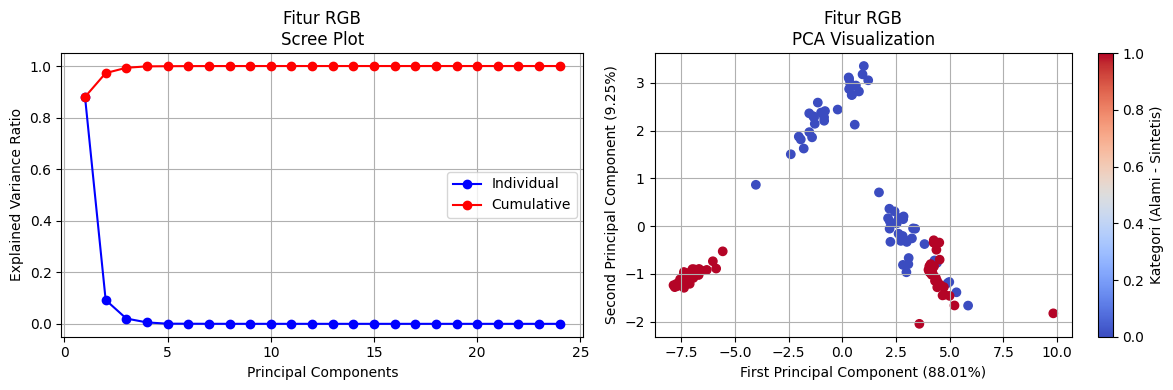


Komponen PCA untuk Fitur RGB:
PC1: 0.8801 (88.01%)
PC2: 0.0925 (9.25%)
PC3: 0.0206 (2.06%)
PC4: 0.0055 (0.55%)
PC5: 0.0006 (0.06%)
PC6: 0.0004 (0.04%)
PC7: 0.0001 (0.01%)
PC8: 0.0001 (0.01%)
PC9: 0.0000 (0.00%)
PC10: 0.0000 (0.00%)
PC11: 0.0000 (0.00%)
PC12: 0.0000 (0.00%)
PC13: 0.0000 (0.00%)
PC14: 0.0000 (0.00%)
PC15: 0.0000 (0.00%)
PC16: 0.0000 (0.00%)
PC17: 0.0000 (0.00%)
PC18: 0.0000 (0.00%)
PC19: 0.0000 (0.00%)
PC20: 0.0000 (0.00%)
PC21: 0.0000 (0.00%)
PC22: 0.0000 (0.00%)
PC23: 0.0000 (0.00%)
PC24: 0.0000 (0.00%)
Total variance explained by first 2 PCs: 97.26%

Component loadings for Fitur RGB:

Top 5 features contributing to PC1:
homogeneity_B    0.217278
homogeneity_G    0.217252
homogeneity_R    0.217239
energy_R         0.207060
energy_G         0.206086
Name: PC1, dtype: float64

Top 5 features contributing to PC2:
correlation_G    0.397711
correlation_R    0.370921
correlation_B    0.354777
mean_G           0.261028
mean_B           0.205396
Name: PC2, dtype: float64

Ana

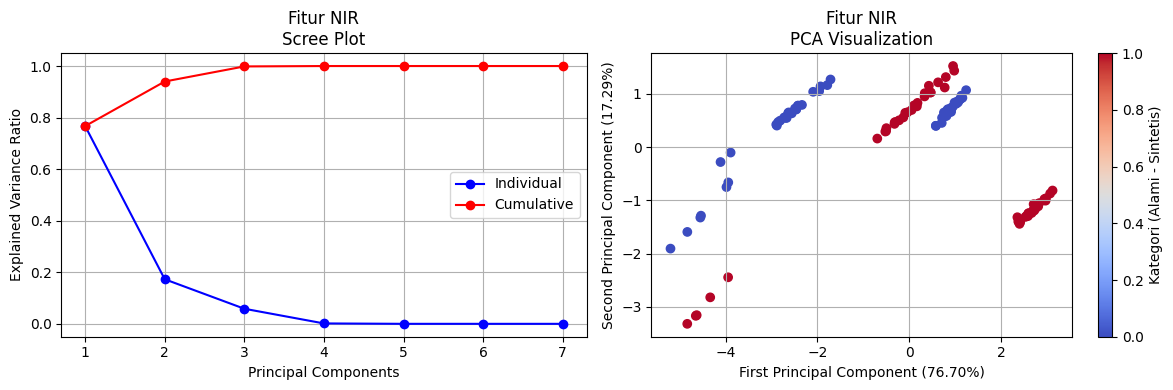


Komponen PCA untuk Fitur NIR:
PC1: 0.7670 (76.70%)
PC2: 0.1729 (17.29%)
PC3: 0.0585 (5.85%)
PC4: 0.0016 (0.16%)
PC5: 0.0000 (0.00%)
PC6: 0.0000 (0.00%)
PC7: 0.0000 (0.00%)
Total variance explained by first 2 PCs: 93.99%

Component loadings for Fitur NIR:

Top 5 features contributing to PC1:
energy         0.422982
asm            0.422847
homogeneity    0.401149
mean_nir      -0.193130
correlation   -0.349604
Name: PC1, dtype: float64

Top 5 features contributing to PC2:
mean_nir       0.712026
correlation    0.429276
homogeneity    0.309904
energy        -0.089335
asm           -0.112492
Name: PC2, dtype: float64


In [51]:
# Visualisasi 5: PCA untuk Reduksi Dimensi dan Visualisasi

def plot_pca(data, title_prefix):
    # Pilih fitur numerik untuk PCA
    if 'mean_nir' in data.columns:  # untuk data NIR
        features = ['mean_nir', 'contrast', 'dissimilarity', 'homogeneity', 
                   'energy', 'correlation', 'asm']
    else:  # untuk data RGB
        features = ['mean_R', 'mean_G', 'mean_B', 
                   'contrast_R', 'contrast_G', 'contrast_B',
                   'dissimilarity_R', 'dissimilarity_G', 'dissimilarity_B',
                   'homogeneity_R', 'homogeneity_G', 'homogeneity_B',
                   'energy_R', 'energy_G', 'energy_B',
                   'correlation_R', 'correlation_G', 'correlation_B',
                   'asm_R', 'asm_G', 'asm_B',
                   'entropy_R', 'entropy_G', 'entropy_B']
    
    # Standardisasi data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[features])
    
    # Aplikasikan PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Plot variance explained
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Scree plot
    plt.subplot(1, 2, 1)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    components = range(1, len(explained_variance_ratio) + 1)
    
    plt.plot(components, explained_variance_ratio, 'bo-', label='Individual')
    plt.plot(components, cumulative_variance_ratio, 'ro-', label='Cumulative')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'{title_prefix}\nScree Plot')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Scatter plot PC1 vs PC2
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                         c=[0 if x == 'Alami' else 1 for x in data['Kategori']], 
                         cmap='coolwarm')
    plt.xlabel(f'First Principal Component ({explained_variance_ratio[0]:.2%})')
    plt.ylabel(f'Second Principal Component ({explained_variance_ratio[1]:.2%})')
    plt.title(f'{title_prefix}\nPCA Visualization')
    plt.colorbar(scatter, label='Kategori (Alami - Sintetis)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print explained variance information
    print(f"\nKomponen PCA untuk {title_prefix}:")
    for i, ratio in enumerate(explained_variance_ratio, 1):
        print(f"PC{i}: {ratio:.4f} ({ratio:.2%})")
    print(f"Total variance explained by first 2 PCs: {sum(explained_variance_ratio[:2]):.2%}")
    
    # Print component loadings for first 2 PCs
    print(f"\nComponent loadings for {title_prefix}:")
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i}' for i in range(1, len(features) + 1)],
        index=features
    )
    print("\nTop 5 features contributing to PC1:")
    print(loadings.iloc[:, 0].sort_values(ascending=False).head())
    print("\nTop 5 features contributing to PC2:")
    print(loadings.iloc[:, 1].sort_values(ascending=False).head())

# Jalankan analisis PCA
print("Analisis PCA untuk Data RGB:")
plot_pca(rgb_data, 'Fitur RGB')

print("\nAnalisis PCA untuk Data NIR:")
plot_pca(nir_data, 'Fitur NIR')

In [52]:
# Analisis Statistik: Uji t untuk melihat perbedaan signifikan antara kain alami dan sintetis
from scipy import stats

def print_significance(p_value):
    if p_value < 0.001:
        return "sangat signifikan (p < 0.001)"
    elif p_value < 0.01:
        return "signifikan (p < 0.01)" 
    elif p_value < 0.05:
        return "cukup signifikan (p < 0.05)"
    else:
        return "tidak signifikan (p > 0.05)"

print("\nUji Statistik Perbedaan antara Kain Alami dan Sintetis:")

# Untuk fitur RGB
print("\n--- Fitur RGB ---")
rgb_features = ['mean_R', 'mean_G', 'mean_B']
for feature in rgb_features:
    alami = rgb_data[rgb_data['Kategori'] == 'Alami'][feature]
    sintetis = rgb_data[rgb_data['Kategori'] == 'Sintetis'][feature]
    t_stat, p_value = stats.ttest_ind(alami, sintetis)
    print(f"{feature}:")
    print(f"- t-statistic = {t_stat:.3f}")
    print(f"- p-value = {p_value:.4f}")
    print(f"- Perbedaan {print_significance(p_value)}")

# Untuk fitur NIR utama
print("\n--- Fitur NIR ---")
nir_main_features = ['mean_nir', 'contrast', 'homogeneity', 'energy', 'correlation']
for feature in nir_main_features:
    alami = nir_data[nir_data['Kategori'] == 'Alami'][feature]
    sintetis = nir_data[nir_data['Kategori'] == 'Sintetis'][feature]
    t_stat, p_value = stats.ttest_ind(alami, sintetis)
    print(f"{feature}:")
    print(f"- t-statistic = {t_stat:.3f}")
    print(f"- p-value = {p_value:.4f}")
    print(f"- Perbedaan {print_significance(p_value)}")

# Analisis effect size menggunakan Cohen's d
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_se = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (group1.mean() - group2.mean()) / pooled_se

print("\n--- Effect Size Analysis ---")
for feature in rgb_features + nir_main_features:
    if feature in rgb_data.columns:
        alami = rgb_data[rgb_data['Kategori'] == 'Alami'][feature]
        sintetis = rgb_data[rgb_data['Kategori'] == 'Sintetis'][feature]
    else:
        feature_nir = feature.replace('mean_R', 'mean_nir')
        alami = nir_data[nir_data['Kategori'] == 'Alami'][feature_nir]
        sintetis = nir_data[nir_data['Kategori'] == 'Sintetis'][feature_nir]
    
    d = cohens_d(alami, sintetis)
    print(f"{feature}: Cohen's d = {d:.3f}")
    


Uji Statistik Perbedaan antara Kain Alami dan Sintetis:

--- Fitur RGB ---
mean_R:
- t-statistic = 8.326
- p-value = 0.0000
- Perbedaan sangat signifikan (p < 0.001)
mean_G:
- t-statistic = 9.829
- p-value = 0.0000
- Perbedaan sangat signifikan (p < 0.001)
mean_B:
- t-statistic = 8.253
- p-value = 0.0000
- Perbedaan sangat signifikan (p < 0.001)

--- Fitur NIR ---
mean_nir:
- t-statistic = 8.781
- p-value = 0.0000
- Perbedaan sangat signifikan (p < 0.001)
contrast:
- t-statistic = 3.259
- p-value = 0.0015
- Perbedaan signifikan (p < 0.01)
homogeneity:
- t-statistic = -3.259
- p-value = 0.0015
- Perbedaan signifikan (p < 0.01)
energy:
- t-statistic = -5.366
- p-value = 0.0000
- Perbedaan sangat signifikan (p < 0.001)
correlation:
- t-statistic = 6.877
- p-value = 0.0000
- Perbedaan sangat signifikan (p < 0.001)

--- Effect Size Analysis ---
mean_R: Cohen's d = 1.520
mean_G: Cohen's d = 1.795
mean_B: Cohen's d = 1.507
mean_nir: Cohen's d = 1.603
contrast: Cohen's d = 0.595
homogeneity: 

In [65]:
# Simpan hasil data gabungan ke folder outputs
output_dir = r'D:\Semester7\CV\identifikasi_kain\outputs\analysis_results'
os.makedirs(output_dir, exist_ok=True)

print("\nMenyimpan hasil analisis...")
rgb_data.to_csv(os.path.join(output_dir, 'combined_rgb_analysis.csv'), index=False)
nir_data.to_csv(os.path.join(output_dir, 'combined_nir_analysis.csv'), index=False)

print("Analisis selesai!")


Menyimpan hasil analisis...
Analisis selesai!
